# Second Version Model 

- Author: Wen Xin
- Description: This is the second version of ridge model.

In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [47]:
data=pd.read_csv('data_final.csv')

In [48]:
dict(data.corr()['label'].sort_values())

{'log_last_order': -0.5536361065888085,
 'last_order': -0.4844014127601791,
 'lastgap': -0.4251957405575823,
 'log_lastgap': -0.4158685435361861,
 'lastgap_na': -0.41452963920892577,
 'min_gap': -0.37533209394270584,
 'avg_gap': -0.37327555354711695,
 'log_min_gap': -0.3619797241583687,
 'log_avg_gap': -0.360780652496656,
 'max_gap_na': -0.3592693081294099,
 'avg_gap_na': -0.3592693081294099,
 'min_gap_na': -0.3592693081294099,
 'log_max_gap': -0.3585205840904891,
 'max_gap': -0.352800661570623,
 'pca_4': -0.26476729833274054,
 'log_overall_time_min': -0.1932759026182171,
 'overall_time_min': -0.1599887013343128,
 'update2create_time_min': -0.150285579358441,
 'update2create_time_mean': -0.14261494102564126,
 'send2update_time_min': -0.13633923013060498,
 'pca_1': -0.13561229333435332,
 'log_update2create_time_min': -0.1339929903264002,
 'send2update_time_mean': -0.13399201386669532,
 'log_send2update_time_min': -0.1339903942582723,
 'update2create_time_mean_na': -0.13399037709380412,


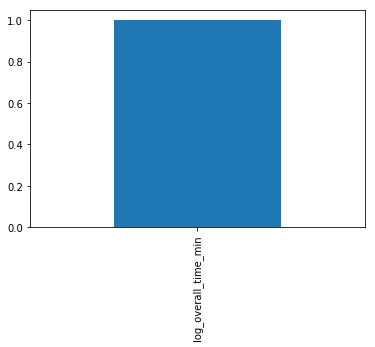

In [50]:
# this piece of code from one kaggle
# 看看有没有NAN什么的,Type Error说明没有NAN了！
import matplotlib.pyplot as plt
nan_value = data.isnull().sum()
nan_value = nan_value[nan_value > 0]
nan_value.sort_values(inplace=True,ascending=False)
nan_value.plot.bar()

In [52]:
X=X.fillna(0)

In [53]:
X=data
y=data['label']
#先删了吧= 。 =晚点再处理
X=X.drop(['label','label.1','log_overall_time_min'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import RidgeClassifier

In [57]:
ridge=RidgeClassifier()
ridge.fit(X_train,y_train)
ridge_predict=ridge.predict(X_test)

In [58]:
from sklearn import metrics

In [60]:
print(metrics.classification_report(y_train, ridge_train_predict))

             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88    108250
        1.0       0.77      0.58      0.66     45234

avg / total       0.82      0.82      0.82    153484



In [59]:
print(metrics.classification_report(y_test, ridge_predict))

             precision    recall  f1-score   support

        0.0       0.84      0.92      0.88     27008
        1.0       0.76      0.59      0.66     11363

avg / total       0.82      0.82      0.82     38371



In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(y_test,ridge_predict)

Text(0.5,1,'ROC curve')

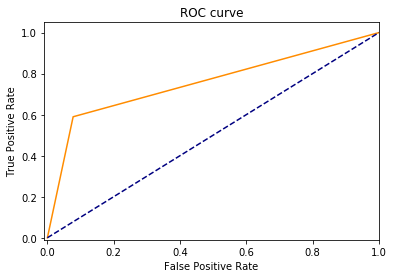

In [62]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [63]:
# baseline1

In [64]:
ridge_train_predict=ridge.predict(X_train)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ridge_predict)

0.7560641710509248

In [66]:
roc_auc_score(y_train,ridge_train_predict)

0.753856534167058

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.transform(X_test)

In [70]:
ridge2=RidgeClassifier()
ridge2.fit(X_train2,y_train)
ridge_predict2=ridge2.predict(X_test2)

In [71]:
ridge_train_predict2=ridge2.predict(X_train2)

In [72]:
fpr, tpr, thresholds2 = roc_curve(y_test,ridge_predict2)

Text(0.5,1,'ROC curve')

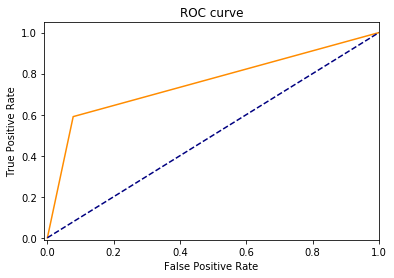

In [73]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [74]:
# baseline2
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ridge_predict2)

0.7563421386313273

In [75]:
roc_auc_score(y_train, ridge_train_predict2)

0.7540518680332122

In [76]:
print(metrics.classification_report(y_train, ridge_train_predict2))

             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88    108250
        1.0       0.77      0.58      0.66     45234

avg / total       0.82      0.82      0.82    153484



In [77]:
print(metrics.classification_report(y_test, ridge_predict2))

             precision    recall  f1-score   support

        0.0       0.84      0.92      0.88     27008
        1.0       0.76      0.59      0.67     11363

avg / total       0.82      0.82      0.82     38371



In [78]:
from sklearn.linear_model import Ridge

In [79]:
clf = Ridge()
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
prediction2=clf.predict(X_train)

Text(0.5,1,'Residual plot')

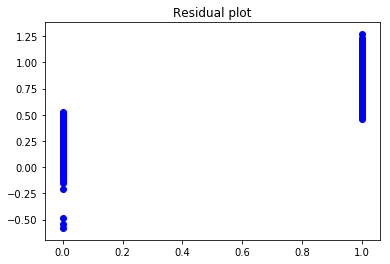

In [81]:
plt.scatter(ridge_train_predict2, prediction2, c='b')
plt.title('Residual plot')